# Data Wrangling and Exploratory Data Analysis of Instacart Market Basket Analysis

## Importing required libraries

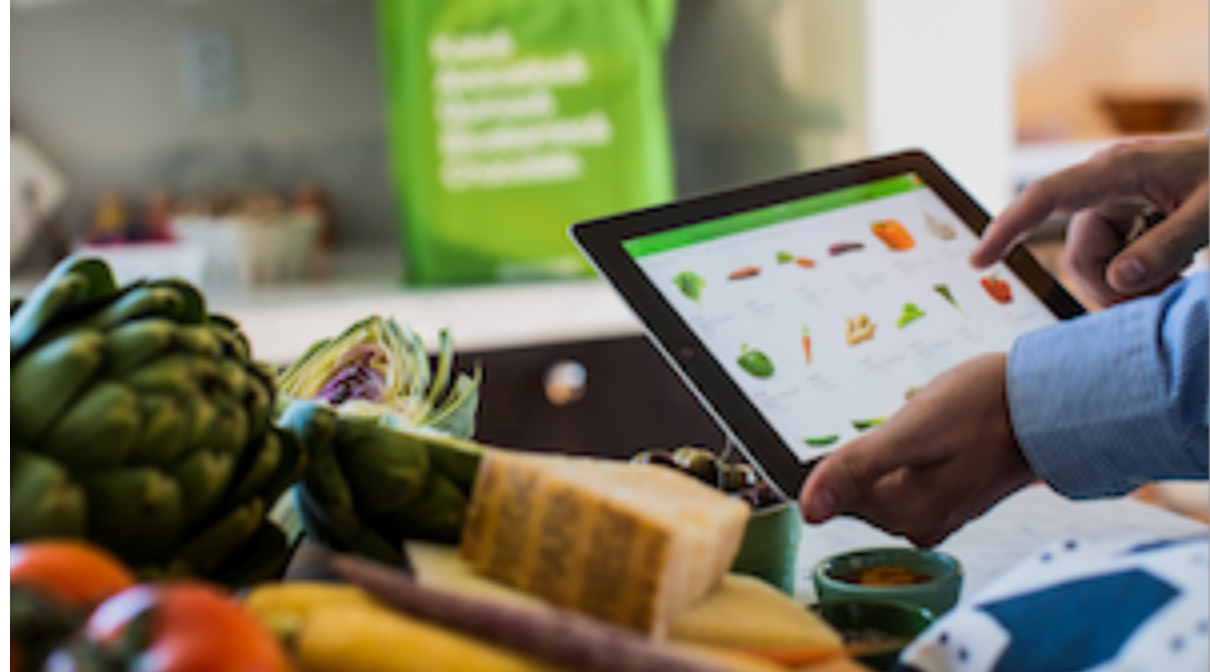

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
Image(filename=r'C:\Users\Thinkpad\Documents\SpringBoard Files\Instacart\instacartpic.png')

## Project Description

Whether you shop from meticulously planned grocery lists or let whimsy guide your grazing, our unique food rituals define who we are. Instacart, a grocery ordering and delivery app, aims to make it easy to fill your refrigerator and pantry with your personal favorites and staples when you need them. After selecting products through the Instacart app, personal shoppers review your order and do the in-store shopping and delivery for you.

Instacart’s data science team plays a big part in providing this delightful shopping experience. Currently they use transactional data to develop models that predict which products a user will buy again, try for the first time, or add to their cart next during a session. Recently, Instacart open sourced this data - see their blog post on 3 Million Instacart Orders, Open Sourced.

In this competition, Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order. They’re not only looking for the best model, Instacart’s also looking for machine learning engineers to grow their team.


## Loading Datasets

In [2]:
aisles=pd.read_csv(r'C:\Users\Thinkpad\Documents\SpringBoard Files\Instacart\aisles.csv')
departments=pd.read_csv(r'C:\Users\Thinkpad\Documents\SpringBoard Files\Instacart\departments.csv')
order_products_train=pd.read_csv(r'C:\Users\Thinkpad\Documents\SpringBoard Files\Instacart\order_products__train.csv')
order_products_prior=pd.read_csv(r'C:\Users\Thinkpad\Documents\SpringBoard Files\Instacart\order_products__prior.csv')
orders=pd.read_csv(r'C:\Users\Thinkpad\Documents\SpringBoard Files\Instacart\orders.csv')
products=pd.read_csv(r'C:\Users\Thinkpad\Documents\SpringBoard Files\Instacart\products.csv')


## Analysing Datasets

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
aisles.shape

(134, 2)

In [5]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [6]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
aisles.describe().T

,count,mean,std,min,25%,50%,75%,max
aisle_id,134.0,67.5,38.826537,1.0,34.25,67.5,100.75,134.0


In [8]:
for col in aisles.columns:
    print(col+ "     "+str(aisles[col].nunique()))

aisle_id     134
aisle     134


**aisles** dataset consists of two columns *aisle_id, aisle*. There are no null values in both the columns. Out of 134 rows we have 134 unique aisle_id's and 134 unique aisles

In [9]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
departments.shape

(21, 2)

In [11]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [12]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [13]:
for col in departments.columns:
    print(col + "       "+str(departments[col].nunique()))

department_id       21
department       21


In the **departments** dataset we have two columns *department_id, department*. We don't have null values in this dataset. Each department has unique name and unique id

In [14]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [15]:
products.shape

(49688, 4)

In [16]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
for col in products.columns:
    print(col+"          "+str(products[col].nunique()))

product_id          49688
product_name          49688
aisle_id          134
department_id          21


- In the **products** dataset we have *product_id, product_name, aisle_id and department_id* columns. We have 49688 unique products. No null values in any of the columns


In [19]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [20]:
orders.shape

(3421083, 7)

In [21]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [23]:
orders[orders.eval_set=='test']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0
3420929,350108,206204,test,5,4,14,14.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0


In [24]:
orders.head(30)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [25]:
for col in orders.columns:
    print(col+ "    "+ str(orders[col].nunique()))

order_id    3421083
user_id    206209
eval_set    3
order_number    100
order_dow    7
order_hour_of_day    24
days_since_prior_order    31


- **Orders** dataset consists of 3421083 rows and seven columns. *order_id* represents order id of the product, *user_id* represents unique id of that user, *eval_set* represents to which set the row belongs to, *order_number* represents the number in which the products are added in the cart, *order_dow* represents on which day of the week order was placed, *order_hour_of_day*	represents hour of the day and *days_since_prior_order* represents the days difference between the two orders by the same user.

In [26]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [27]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [28]:
order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [29]:
for col in order_products_prior.columns:
    print(col+ "    "+ str(order_products_prior[col].nunique()))

order_id    3214874
product_id    49677
add_to_cart_order    145
reordered    2


In [30]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [31]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [32]:
for col in order_products_train.columns:
    print(col+ "    "+ str(order_products_train[col].nunique()))

order_id    131209
product_id    39123
add_to_cart_order    80
reordered    2


**order_products_train, order_products_prior** datasets have same number of columns. They don't have null values. Consists of columns like *order_id, product_id, add_to_cart_order and	reordered*. Since the dataset doesn't consists of null values there's no need of doing Data cleaning

# Exploratory Data Analysis

## Bar plot showing Count of rows of each type

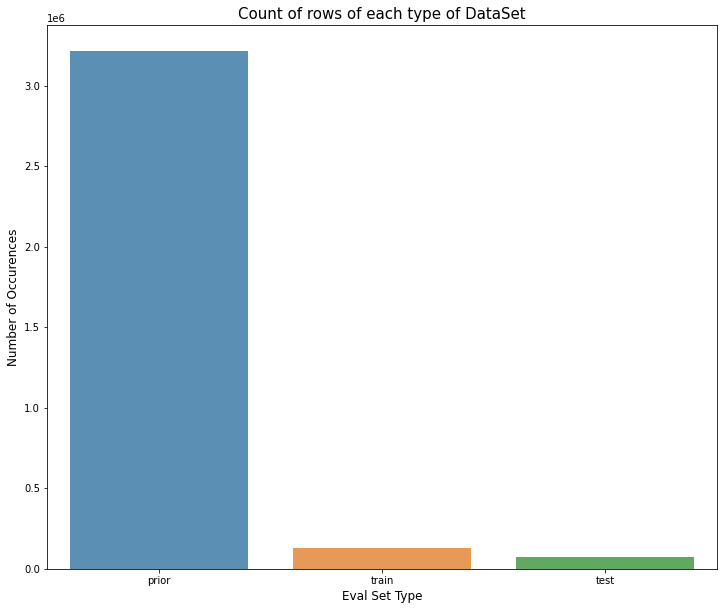

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [33]:
#Count no. of rows in each dataset
count=orders.eval_set.value_counts()

plt.figure(figsize=(12,10))
sns.barplot(count.index,count.values,alpha=0.8)
plt.title('Count of rows of each type of DataSet',fontsize=15)
plt.xlabel('Eval Set Type',fontsize=12)
plt.ylabel('Number of Occurences',fontsize=12)
plt.show()
count

In [34]:
 ## Defining a function to get unique count for user_id from orders.csv
def unique_count(x):
    return (len(np.unique(x)))
count=orders.groupby('eval_set').user_id.aggregate(unique_count)
count

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

- So there are 206,209 customers in total. Out of which, the last purchase of 131,209 customers are given as train set and we need to predict for the rest 75,000 customers.

## Barplot showing count of maximum order number  

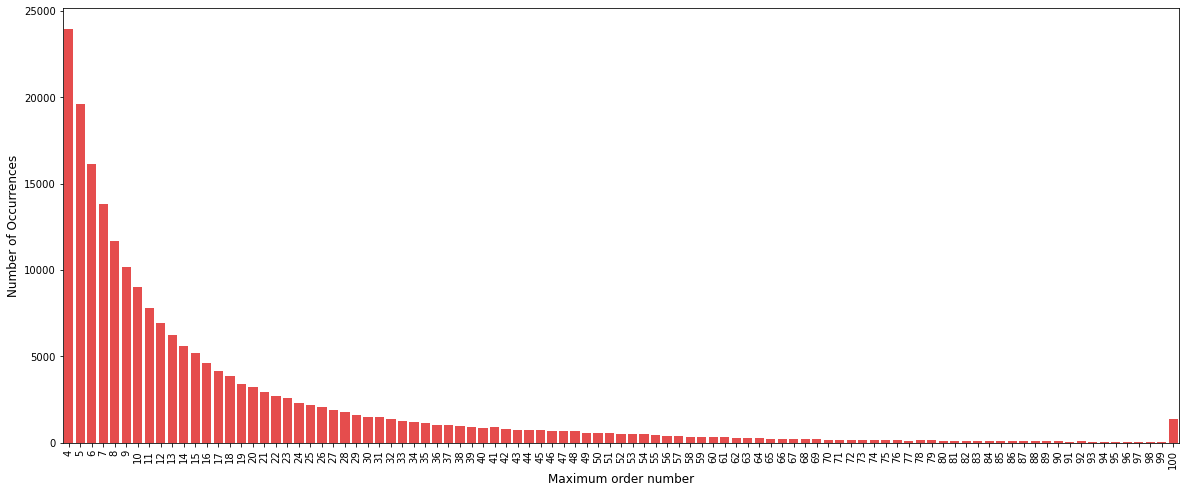

In [35]:
#Validating prior order range
count = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count = count.order_number.value_counts()

#Bar-graph for the order-reorder counts
plt.figure(figsize=(20,8))
sns.barplot(count.index, count.values, alpha=0.8, color = 'red')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


In [36]:
#Changing the data labels into name of days of weeks
import calendar
days=[]

## Bar plot of Frequency of order by week day

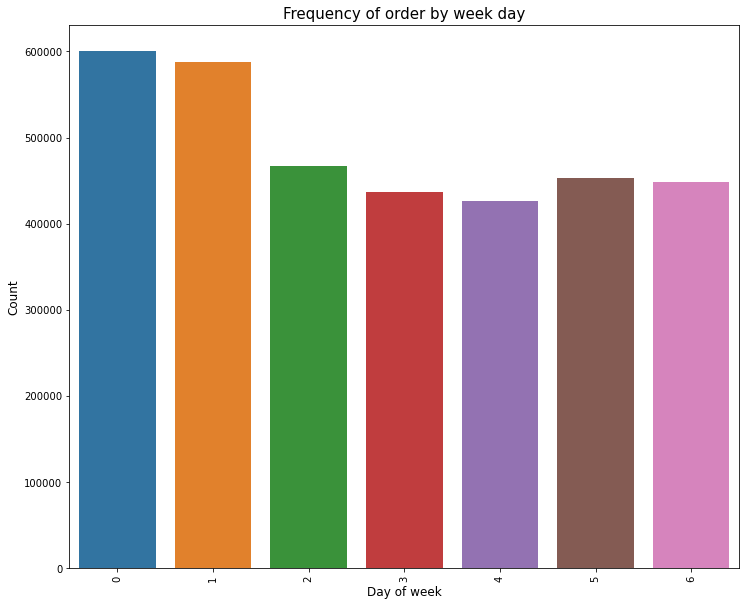

In [37]:
plt.figure(figsize=(12,10))
sns.countplot(x=orders['order_dow'])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

## Bar plot showing orders on each hour of the day

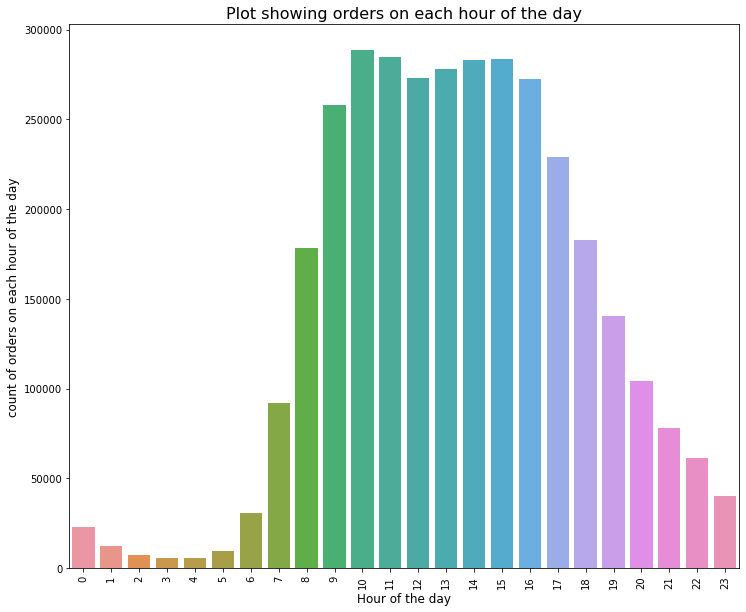

In [38]:
plt.figure(figsize=(12,10))
sns.countplot(x=orders['order_hour_of_day'])
plt.xlabel('Hour of the day',fontsize=12)
plt.ylabel('count of orders on each hour of the day',fontsize=12)
plt.title('Plot showing orders on each hour of the day',fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

- From the above plots is is evident that most of the orders are placed on 0th day and 1st day which may be saturday and sunday respectively followed by lowest orders on 4th day which may be wednesday.
- Most of the orders are placed between 10 A.M and 4 P.M 

## Heat map showing the No. of orders placed on respective day and hour

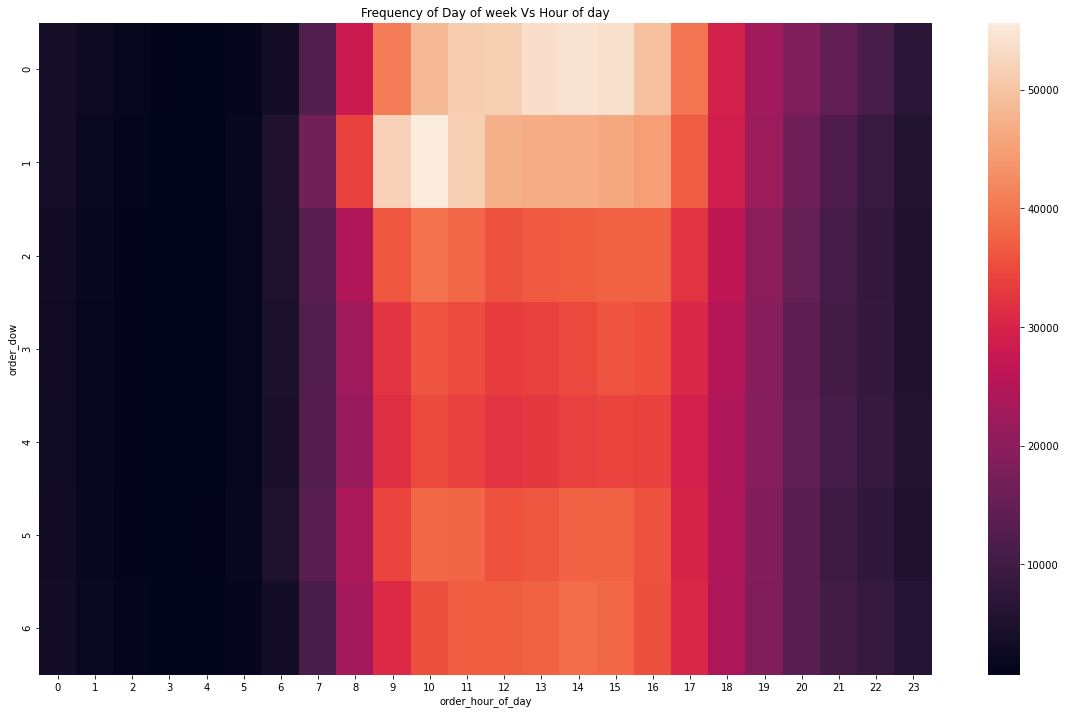

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


In [39]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped = grouped.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(20,12))
sns.heatmap(grouped)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()
grouped

- In the above heat map we can see that most of the orders are placed on the saturday mornings and sunday evenings. 

## Barplot showing Frequency distribution by days since prior order

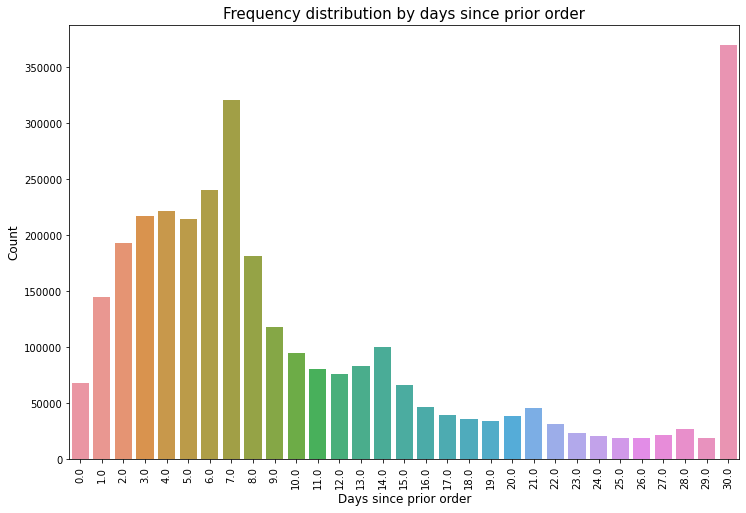

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

- In the above bar plot we can say that the spikes in the plot are observed at the intervals of seven and at the end of the month

In [41]:
# percentage of re-orders in prior set #
order_products_prior.reordered.sum() / order_products_prior.shape[0]


0.5896974667922161

In [42]:
# percentage of re-orders in train set #
order_products_train.reordered.sum() / order_products_train.shape[0]

0.5985944127509629

In [43]:
grouped = order_products_prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped["reordered"].loc[grouped["reordered"]>1] = 1
grouped.reordered.value_counts() / grouped.shape[0]


1    0.879151
0    0.120849
Name: reordered, dtype: float64

On an average, about 59% of the products in an order are re-ordered products.

In [44]:
grouped = order_products_train.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped["reordered"].loc[grouped["reordered"]>1] = 1
grouped.reordered.value_counts() / grouped.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

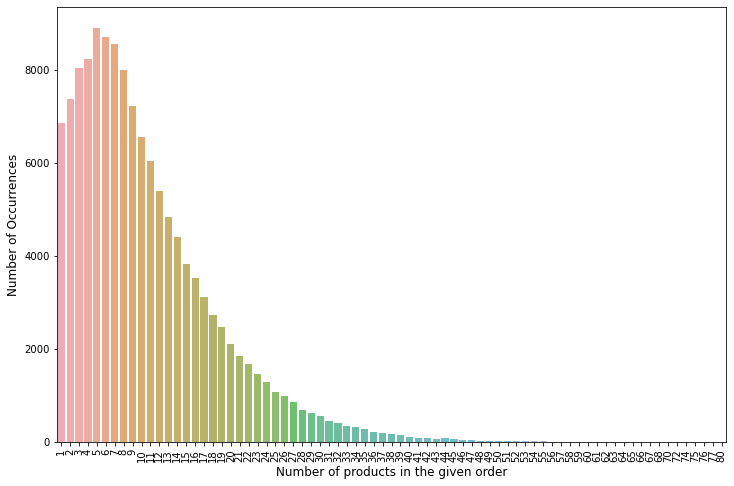

In [45]:
grouped_df = order_products_train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## Merging the dataframes

In [46]:
order_products_prior_df = pd.merge(order_products_prior, products, on='product_id', how='left')

In [47]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [48]:
order_products_prior_df = pd.merge(order_products_prior_df, aisles, on='aisle_id', how='left')

In [49]:
order_products_prior_df = pd.merge(order_products_prior_df, departments, on='department_id', how='left')

In [50]:
order_products_prior_df.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs


In [51]:
cnt_srs=order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs

,index,product_name
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


In [52]:
cnt_srs.columns=['product_name','count']
cnt_srs

,product_name,count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


## Bar plot showing count of occurences of each aisle 

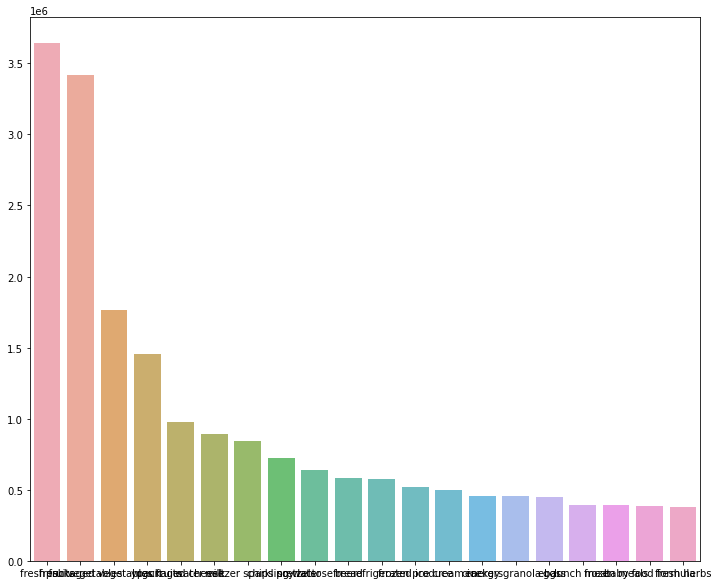

In [53]:
cnt_srs=order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,10))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)


The top two aisles are fresh fruits and fresh vegetables.!

## Pie distrubution of departments

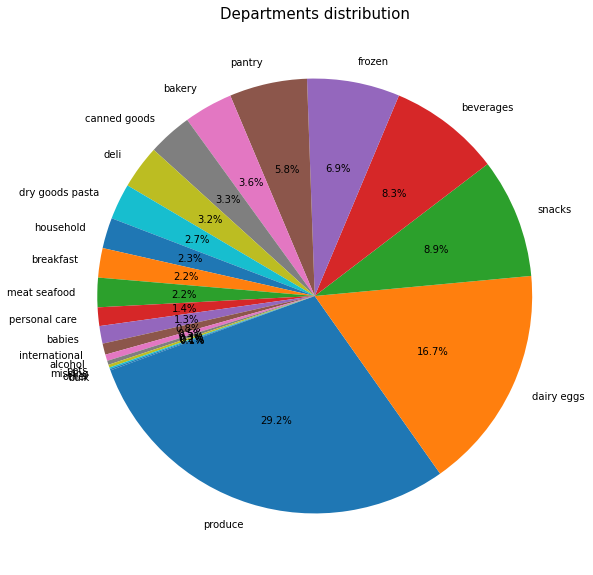

In [54]:
plt.figure(figsize=(20,10))
series=order_products_prior_df['department'].value_counts()
labels=(np.array(series.index))
sizes=((np.array(series/series.sum())*100))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Produce is the largest department. Now let us check the reordered percentage of each department.

## Point plot of department wise reorder ratio

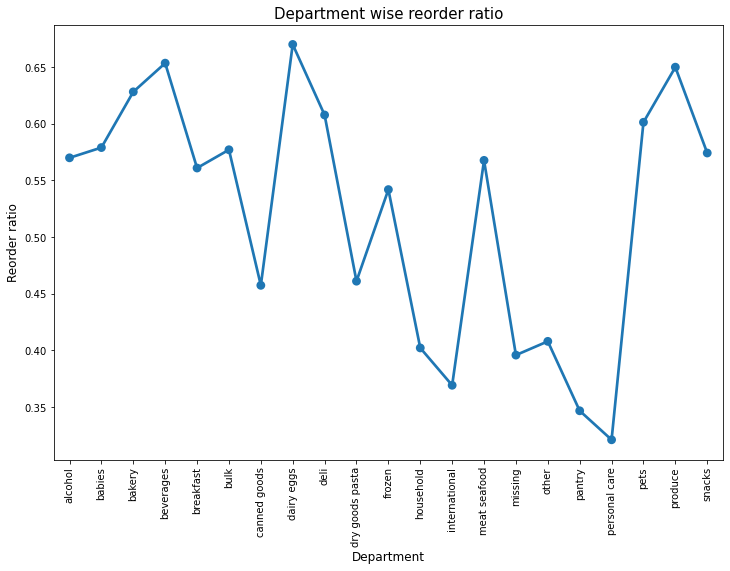

In [55]:
grouped_df = order_products_prior_df.groupby('department')["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

In [56]:
grouped_df.sort_values('reordered',ascending=False)

,department,reordered
7,dairy eggs,0.669969
3,beverages,0.653460
19,produce,0.649913
2,bakery,0.628141
8,deli,0.607719
18,pets,0.601285
1,babies,0.578971
5,bulk,0.577040
20,snacks,0.574180
0,alcohol,0.569924


## Scatter plot of Reorder ratio of different aisles

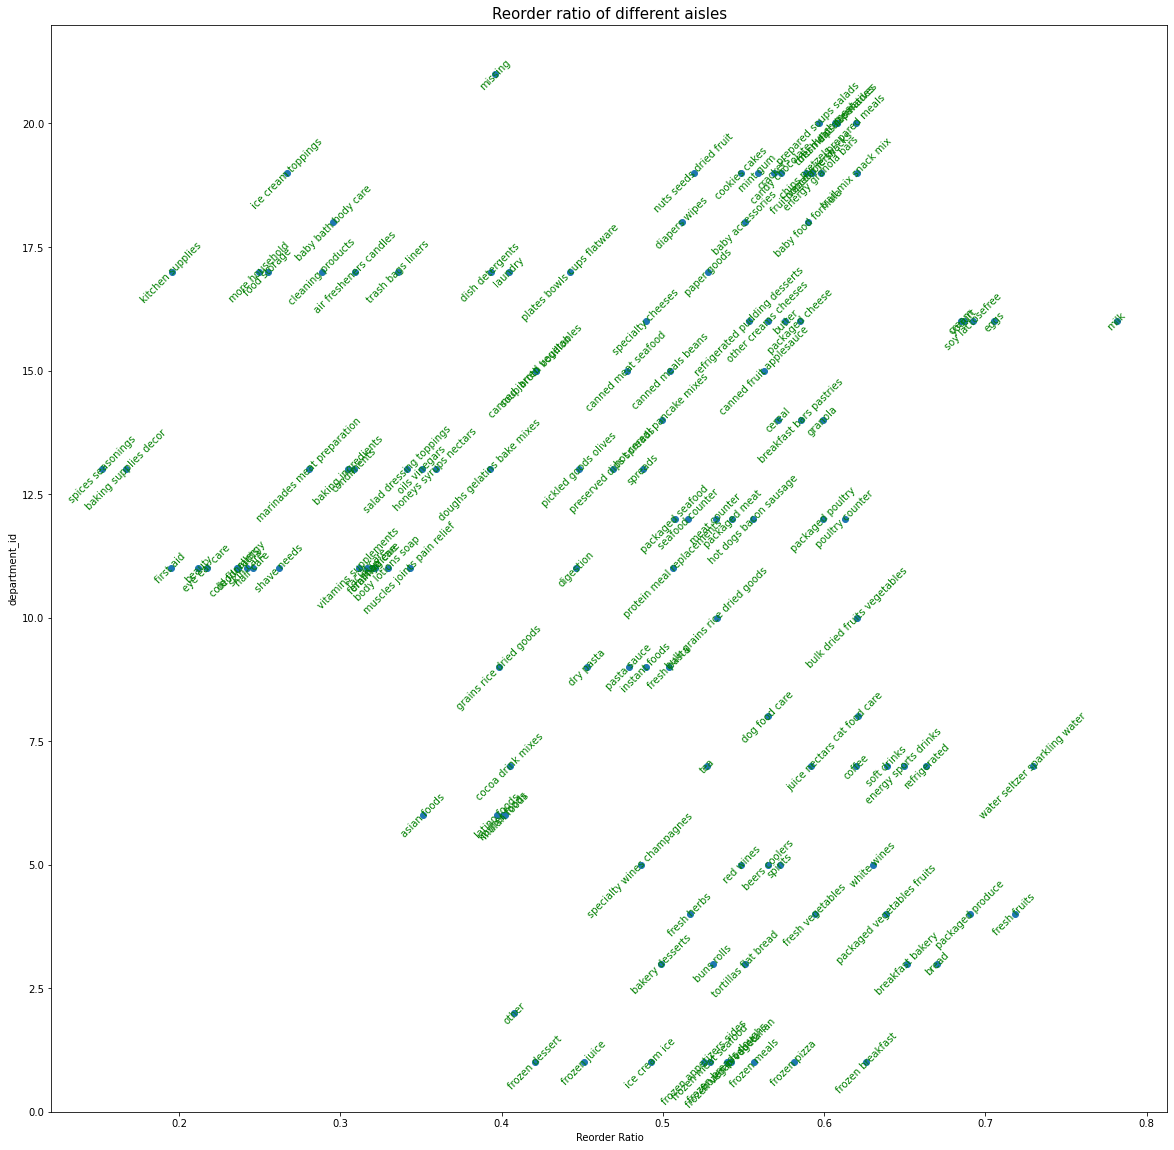

In [57]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

In [58]:
grouped_df.sort_values('reordered',ascending=False)

,department_id,aisle,reordered
96,16,milk,0.781428
38,7,water seltzer sparkling water,0.729593
17,4,fresh fruits,0.718104
95,16,eggs,0.705366
100,16,soy lactosefree,0.692551
...,...,...,...
48,11,beauty,0.212062
107,17,kitchen supplies,0.195377
56,11,first aid,0.194812
73,13,baking supplies decor,0.167229


## Point plot of add to cart order - reorder ratio

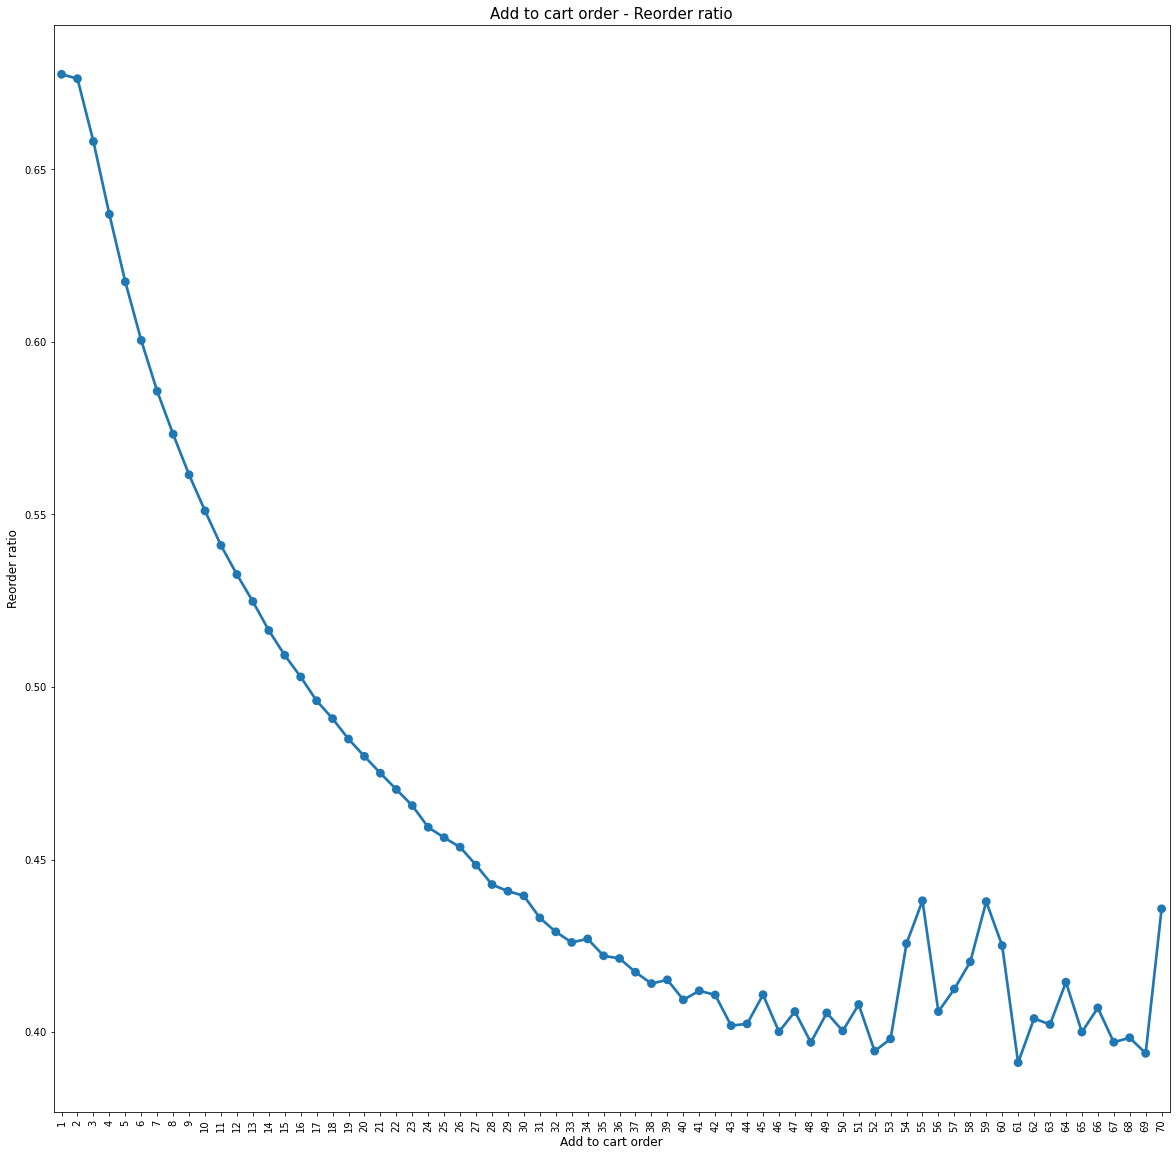

In [59]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(20,20))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
grouped_df.sort_values('reordered',ascending=False).head(20)

,add_to_cart_order_mod,reordered
0,1,0.677533
1,2,0.676251
2,3,0.658037
3,4,0.636958
4,5,0.617383
5,6,0.600420
6,7,0.585687
7,8,0.573247
8,9,0.561474
9,10,0.551018


Looks like the products that are added to the cart initially are more likely to be reordered again compared to the ones added later. This makes sense to me as well since we tend to first order all the products we used to buy frequently and then look out for the new products available.

## Bar plot showing reorder ratio across day of week

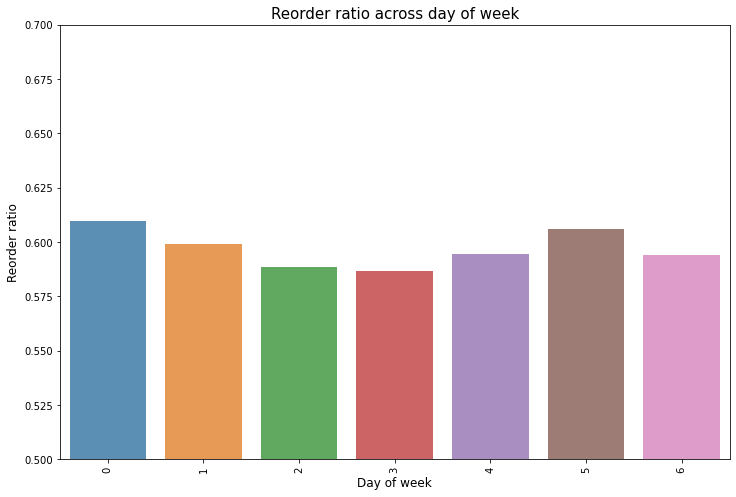

In [61]:
order_products_train_df = pd.merge(order_products_train, orders, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

## Bar plot showing reorder ratio across hour of day

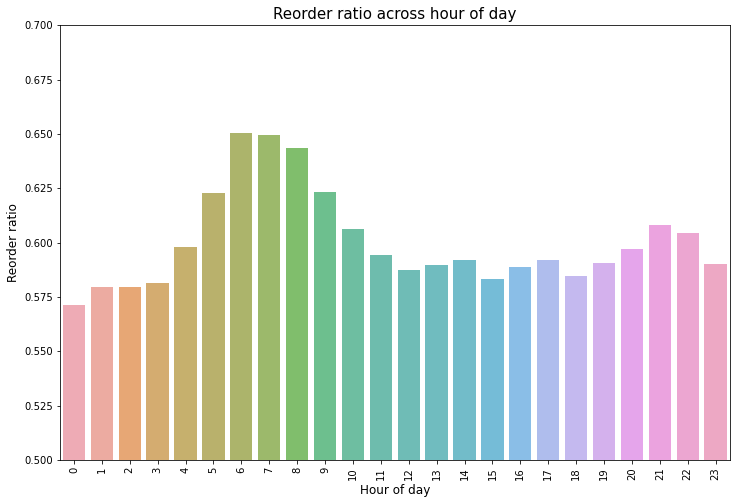

In [62]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

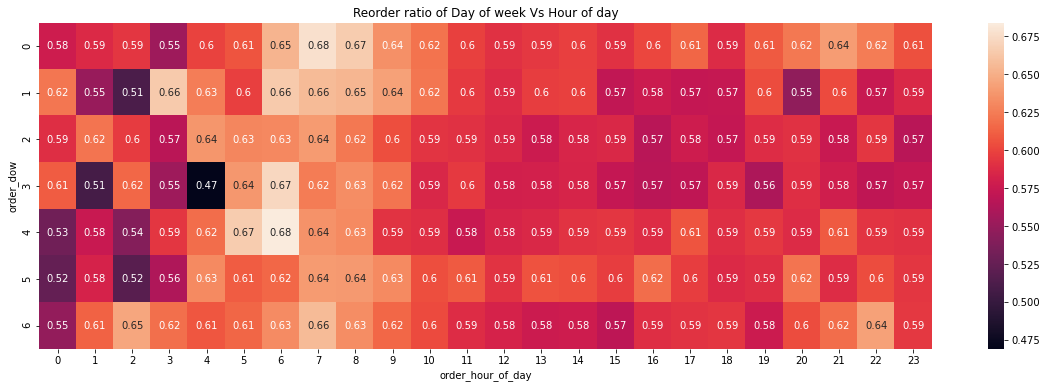

In [63]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(20,6))
sns.heatmap(grouped_df,annot=True)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()